In [5]:
import pandas as pd

In [6]:
with open('kinetics.csv', mode = 'r', encoding = 'UTF-8') as f:
    df = pd.read_csv(f, names = ['t', 'c3'])
    
df

,t,c3
0,0,0.00
1,1,0.12
2,2,0.44
3,3,0.56
4,4,0.76
5,5,0.85
6,6,0.91
7,7,0.98
8,8,0.97
9,9,0.91


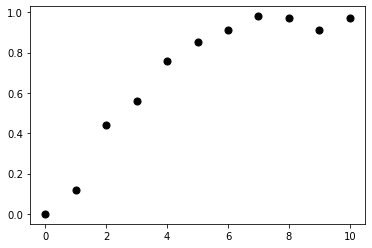

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['t'], df['c3'], s = 50, c = 'k')  #df是调用对应标签的列数据，s是设置点的大小，c是颜色
plt.show()

In [8]:
def func(t, k1, k2):  #这一步就是在写一个函数
    c10 = 1.0 
    
    c1 = c10 *np.exp(-k1 * t)
    c2 = k1 * c10 / (k2 - k1) * (np.exp(-k1 * t) - np.exp(-k2 * t))
    c3 = c10 - c1 - c2
    return c3

def func2(t, k1, k2):  #这一步就是在写一个函数
    c10 = 1.0 
    
    c1 = c10 *np.exp(-k1 * t)
    c2 = k1 * c10 / (k2 - k1) * (np.exp(-k1 * t) - np.exp(-k2 * t))
    return c2

def func1(t, k1, k2):  #这一步就是在写一个函数
    c10 = 1.0 
    
    c1 = c10 *np.exp(-k1 * t)
    return c1

In [9]:
from scipy.optimize import curve_fit

#第一个参数是函数名称func,第二个参数是子变量数据，对应函数fun里的t,第三个参数是对应fun函数的返回值c3。
#等于我知道了函数的数据，定义了这个函数的关系。我要求未知的k1,k2。就用curve_fit这个函数来操作。
pfit, pcov = curve_fit(func, df['t'], df['c3'], p0 = [1, 0]) #p0数组内的参数表示k1,k2的初始值。这里必须加，因为函数公式里k2-k1不能等于0。
#上面的，pfit, pcov这么写是因为函数curve_fit会返回两个结果，这样可以分别命名，第一个是系数，第二个是协方差矩阵。
print(pfit)
#输出的结果一个是k1,k2。

[0.93621629 0.51942599]


help(curve_fit)

In [10]:
print(pcov)
#下面的，实际上是一个2*2的协方差矩阵，斜对角的数值是一样的，因为表示cov(x,y)和cov(y,x).
#主对角线的是cov(x,x)和cov(y,y)在这里代表的是估计参数的协方差，即k1和k2。

[[ 0.16212683 -0.05382976]
 [-0.05382976  0.01869323]]


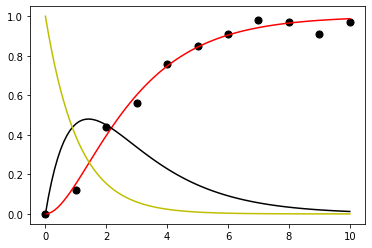

In [13]:
#画散点
plt.scatter(df['t'], df['c3'], s = 50, c = 'k')
#获取一个等距数组
t_cuv = np.linspace(0, 10, 100)
#画曲线，注意输入值里的y值的表达方式
plt.plot(t_cuv, func(t_cuv, 0.936, 0.519), c = 'r')  #c3的曲线
plt.plot(t_cuv, func2(t_cuv, 0.936, 0.519), c = 'k')  #c2的曲线
plt.plot(t_cuv, func1(t_cuv, 0.936, 0.519), c = 'y')  #c1的曲线
plt.show()